Assignment 10 - Ivan Siat - 3081845

In [3]:
# Following are shell commands to download the data
# !curl -O https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD&bom=true&format=true Fremont Bridge Bicycle Counter
# !curl -O https://data.winnipeg.ca/api/views/r4hg-nw9q/rows.csv?accessType=DOWNLOAD Manitoba Potential Covid Exposures
# !curl -O https://data.winnipeg.ca/api/views/mer2-irmb/rows.csv?accessType=DOWNLOAD Transit Pass-Ups

#Transit Pass-Ups 
from numpy.random import randn
import numpy as np
np.random.seed(123)
import pandas as pd

data = pd.read_csv('Transit_Pass-ups.csv')
data.head()

,Pass-Up ID,Pass-Up Type,Time,Route Number,Route Name,Route Destination,Location
0,3054784,Full Bus Pass-Up,11/23/2019 07:30:06 PM,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)
1,3054854,Full Bus Pass-Up,11/24/2019 09:49:15 AM,170,Fort Richmond - St. Norbert,To Downtown,POINT (-97.151684893085 49.81759394067)
2,3055024,Full Bus Pass-Up,11/24/2019 04:02:09 PM,11,Portage-Kildonan,To Polo Park,POINT (-97.150726428724 49.89119427188)
3,3055083,Full Bus Pass-Up,11/24/2019 06:35:54 PM,11,Portage-Kildonan,Via Donwood,POINT (-97.196676428673 49.881016294322)
4,3054785,Full Bus Pass-Up,11/23/2019 07:30:14 PM,11,Portage-Kildonan,Via Glenway,POINT (-97.188800279492 49.88243163641)


In [4]:
data.tail()

,Pass-Up ID,Pass-Up Type,Time,Route Number,Route Name,Route Destination,Location
142219,3212506,Full Bus Pass-Up,03/18/2021 11:57:20 AM,90,NaN,To Kildonan Place,POINT (-97.086668931195 49.921727251663)
142220,3212358,Full Bus Pass-Up,03/17/2021 10:25:03 PM,43,Munroe,Downtown,POINT (-97.145731363593 49.89292247477)
142221,3214161,Full Bus Pass-Up,03/21/2021 06:35:24 PM,11,Portage-Kildonan,Via Rothesay,POINT (-97.166604681659 49.886265372109)
142222,3214958,Full Bus Pass-Up,03/23/2021 03:45:24 PM,88,NaN,To Cathedral & Main,POINT (-97.167616827755 49.931580074872)
142223,3214791,Wheelchair User Pass-Up,03/23/2021 10:38:14 AM,71,Arlington,via Sinclair to Portage,POINT (-97.16903356439 49.892348405109)


In [5]:
data['full'] = data['Pass-Up Type'] == 'Full Bus Pass-Up'
data['full']

0          True
1          True
2          True
3          True
4          True
          ...  
142219     True
142220     True
142221     True
142222     True
142223    False
Name: full, Length: 142224, dtype: bool

In [6]:
data['wheelchair'] = data['Pass-Up Type'] == 'Wheelchair User Pass-Up'
data['wheelchair']

0         False
1         False
2         False
3         False
4         False
          ...  
142219    False
142220    False
142221    False
142222    False
142223     True
Name: wheelchair, Length: 142224, dtype: bool

In [7]:
f_pass = 100 * data['full'].mean()
w_pass = 100 * data['wheelchair'].mean()
print("Percent of Full Bus Pass-Up:",f_pass,"%   |    ", "Percent of Wheelchair User Pass-Up:",  w_pass,"%")

Percent of Full Bus Pass-Up: 94.4460850489369 %   |     Percent of Wheelchair User Pass-Up: 5.553914951063112 %


In [8]:
data.groupby('Route Number').count()

,Pass-Up ID,Pass-Up Type,Time,Route Name,Route Destination,Location,full,wheelchair
Route Number,,,,,,,,
1,189,189,189,189,189,189,189,189
10,92,92,92,92,92,92,92,92
11,11983,11983,11983,11983,11981,11979,11983,11983
12,135,135,135,135,135,135,135,135
137,1032,1032,1032,1032,1030,1032,1032,1032
...,...,...,...,...,...,...,...,...
S436,47,47,47,47,1,46,47,47
S437,16,16,16,16,7,16,16,16
S438,1,1,1,1,0,1,1,1


<AxesSubplot:xlabel='Route Number'>

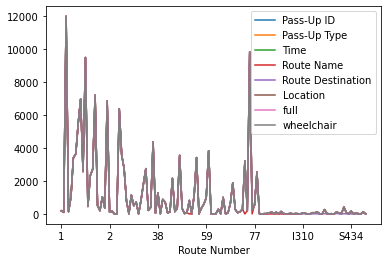

In [9]:
data.groupby('Route Number').count().plot()

Pass-Up Type
Full Bus Pass-Up           AxesSubplot(0.125,0.125;0.775x0.755)
Wheelchair User Pass-Up    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

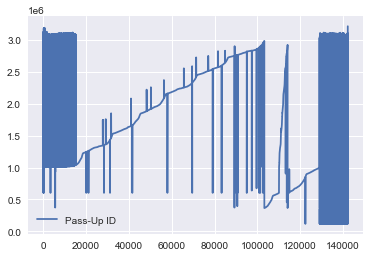

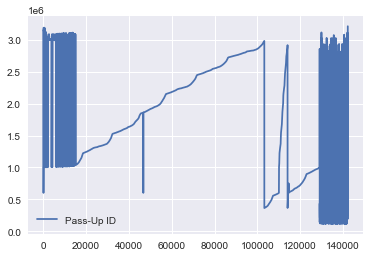

In [12]:
%matplotlib inline
#data.resample('W').sum().plot(); #didnt work because data wasnt in specific format needed (like datetime)
data.groupby(['Pass-Up Type']).plot()


In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [13]:
#potential Covid exposures
data = pd.read_csv('Province_of_Manitoba_-_Potential_COVID-19_Exposures.csv', index_col='Date', parse_dates=True)
data.head()

,Date Added,Location,Endroit,Address,Address-fr,Transit Route,Details,Précisions
Date,,,,,,,,
2020-11-07,11/20/2020 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne",NaN,NaN,32,Graham Ave. to Main St. and Machray Ave. from ...,Depuis l’av. Graham jusqu’au coin de la rue Ma...
2020-11-09,11/23/2020 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne",NaN,NaN,44,From McLeod Ave. southbound at 6:55 a.m. to Ci...,"Depuis l’av. McLeod, en direction sud, à 6 h 5..."
2020-11-10,11/23/2020 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne",NaN,NaN,44,From McLeod Ave. southbound at 6:55 a.m. to Ci...,"Depuis l’av. McLeod, en direction sud, à 6 h 5..."
2020-11-13,11/23/2020 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes",NaN,NaN,18,Route 18 at 5:00 p.m. at 285 Pembina Hwy. and ...,"Ligne 18, à 17 h, au 285, ch. Pembina, et lign..."
2020-11-12,11/23/2020 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes",NaN,NaN,47,Route 47 at 8:22 a.m. at 1131 Nairn Ave. and R...,"Ligne 47, à 8 h 22, au 1131, av. Nairn, et lig..."


In [14]:
data.tail()

,Date Added,Location,Endroit,Address,Address-fr,Transit Route,Details,Précisions
Date,,,,,,,,
2021-03-16,03/22/2021 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes",32,Route 32 from Andrews Street at approximately ...,"Ligne 32, depuis la rue Andrews, à environ 6 h..."
2021-03-09,03/22/2021 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne",14,Route 14 from Dakota Street and Nova Vista Dri...,"Ligne 14, depuis le coin de la rue Dakota et d..."
2021-03-12,03/22/2021 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne",14,Route 14 from Dakota Street and Nova Vista Dri...,"Ligne 14, depuis le coin de la rue Dakota et d..."
2021-03-16,03/22/2021 12:00:00 AM,Winnipeg Transit Routes,"Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes","Régie des transports de Winnipeg, lignes",17,Route 32 from Andrews Street at approximately ...,"Ligne 32, depuis la rue Andrews, à environ 6 h..."
2021-03-10,03/22/2021 12:00:00 AM,Winnipeg Transit Route,"Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne","Régie des transports de Winnipeg, ligne",14,Route 14 from Dakota Street and Nova Vista Dri...,"Ligne 14, depuis le coin de la rue Dakota et d..."


In [15]:

data.groupby('Transit Route').count()



,Date Added,Location,Endroit,Address,Address-fr,Details,Précisions
Transit Route,,,,,,,
10,6,6,6,0,0,6,6
11,14,14,14,6,6,14,14
12,5,5,5,0,0,5,5
14,19,19,19,13,13,19,19
15,7,7,7,0,0,7,7
16,8,8,8,6,6,8,8
17,6,6,6,3,3,6,6
18,6,6,6,2,2,6,6
19,5,5,5,0,0,5,5


looks like the most potential covid exposures is in 

<AxesSubplot:xlabel='Transit Route'>

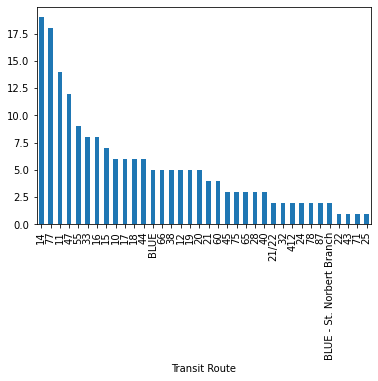

In [138]:
data.groupby('Transit Route').routes.count().sort_values(ascending=False).plot(kind='bar')

In [16]:
data.groupby('Details') #doesnt display any data

In [17]:
data.groupby('Details').count()

,Date Added,Location,Endroit,Address,Address-fr,Transit Route,Précisions
Details,,,,,,,
10:30 a.m. to 11 a.m. Northbound Main St. at James Ave. (Concert Hall) to northbound Main St. at Polson Ave.,1,1,1,0,0,1,1
"11:10 a.m. and 11:30 a.m., boarding the bus at Ellice Avenue and Spence Street and exiting on St. Mary Avenue.",1,1,1,0,0,1,1
"A affected Winnipeg Police Service member works in the Service Centre, where the public report crimes in person and obtain criminal record checks or non-criminal fingerprinting. Anyone identified as a close contact will be contacted by public health officials and provided instructions on next steps.",3,3,3,3,3,0,3
"A passenger rode route 11 between 1 p.m. and 2 p.m., boarding at a stop at Bell MTS Place and exiting at City Hall.",1,1,1,0,0,1,1
"A passenger rode route 15 twice on each day:|Boarding on Kennedy Street at 8:25 a.m., and exiting at Sargent Avenue and Banning Street at 8:40 a.m.|Boarding at Sargent Avenue and Banning Street at 3:30 p.m. and exiting on Kennedy Street at 4 p.m.",2,2,2,0,0,2,2
...,...,...,...,...,...,...,...
Route 77 from McLeod Avenue and Rothesay Street at approximately 8:40 a.m. to Leila Avenue and McPhillips Street at approximately 9:10 a.m.,2,2,2,2,2,2,2
Route 77 from the bus plaza at Garden City Shopping Centre to Jefferson Avenue at Sheppard Street at approximately 9 p.m.,4,4,4,4,4,4,4
Sargent Ave. and Flight Rd. at 11:30 a.m. to Kennedy St. and Sargent Ave. at 11:45 a.m.,1,1,1,0,0,1,1


In [18]:
#Fremont Bridge Bicycle Counter

data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

C:\Users\IVAN-PC\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12,7.0,5.0
2019-11-01 01:00:00,7,0.0,7.0
2019-11-01 02:00:00,1,0.0,1.0
2019-11-01 03:00:00,6,6.0,0.0
2019-11-01 04:00:00,6,5.0,1.0


In [19]:
data.tail()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2021-02-28 19:00:00,17.0,3.0,14.0
2021-02-28 20:00:00,21.0,13.0,8.0
2021-02-28 21:00:00,18.0,10.0,8.0
2021-02-28 22:00:00,8.0,4.0,4.0
2021-02-28 23:00:00,5.0,3.0,2.0


<AxesSubplot:xlabel='Date'>

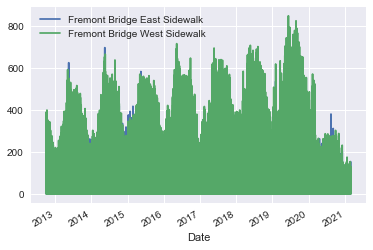

In [20]:
data.plot()

<AxesSubplot:xlabel='Date'>

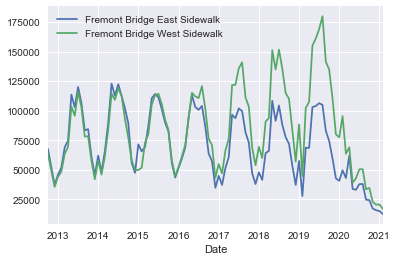

In [21]:
data.resample('M').sum().plot()

<AxesSubplot:xlabel='Date'>

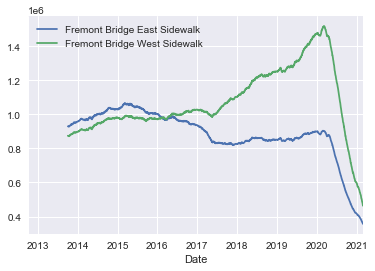

In [22]:
data.resample('D').sum().rolling(365).sum().plot()

we see a steep decline from early 2020 to present

<AxesSubplot:xlabel='Date'>

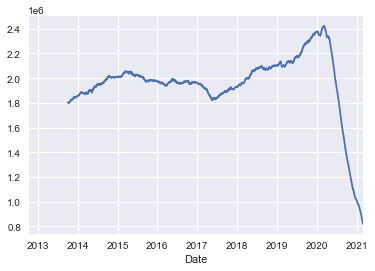

In [23]:
data['Total'] = data['Fremont Bridge West Sidewalk'] + data['Fremont Bridge East Sidewalk']
data['Total'].resample('D').sum().rolling(365).sum().plot()

Decline in bikes passing was probably due to COVID